In [230]:
# Just another day in the life of a data analyst...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

# What are the typical libraries we import?
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [231]:
fifa21_male2 = pd.read_csv('fifa21_male2.csv')
fifa21_male2.shape

C:\Users\zluca\AppData\Local\Temp\ipykernel_46072\4119570986.py:1: DtypeWarning:

Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.



(17125, 107)

Cleaning the dataframe: checking the columns and their types, checking for the nans.

In [232]:
fifa21_male2.columns

Index(['ID', 'Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP',
       'Position', 'Player Photo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=107)

In [233]:
fifa21_male2_numeric = fifa21_male2.select_dtypes(include='number') 
fifa21_male2_numeric.head()

,ID,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
0,2,33,69,71,69,0,313,75,50,59,...,10,12,1929,408,71,59,70,71,68,69
1,16,37,71,70,71,0,337,68,64,61,...,11,11,1906,385,53,69,73,69,58,63
2,27,33,71,71,71,0,337,80,64,41,...,16,7,1770,354,45,68,76,77,36,52
3,36,36,68,70,82,14,264,54,70,60,...,21,21,1348,369,61,66,66,69,47,60
4,41,36,81,82,81,0,367,75,69,54,...,13,7,2014,420,58,70,85,85,63,59


In [234]:
fifa21_male2_numeric.isna().sum()

ID                    0
Age                   0
OVA                   0
BOV                   0
POT                   0
Growth                0
Attacking             0
Crossing              0
Finishing             0
Heading Accuracy      0
Short Passing         0
Volleys              58
Skill                 0
Dribbling             0
Curve                58
FK Accuracy           0
Long Passing          0
Ball Control          0
Movement              0
Acceleration          0
Sprint Speed          0
Agility              58
Reactions             0
Balance              58
Power                 0
Shot Power            0
Jumping              58
Stamina               0
Strength              0
Long Shots            0
Mentality             0
Aggression            0
Interceptions         7
Positioning           7
Vision               58
Penalties             0
Composure           423
Defending             0
Marking               0
Standing Tackle       0
Sliding Tackle       58
Goalkeeping     

In [235]:
fifa21_male2_numeric['Vision'].replace({np.NaN:fifa21_male2_numeric['Vision'].mean()},inplace=True)
fifa21_male2_numeric['Composure'].replace({np.NaN:fifa21_male2_numeric['Composure'].mean()},inplace=True)
fifa21_male2_numeric['Sliding Tackle'].replace({np.NaN:fifa21_male2_numeric['Sliding Tackle'].mean()},inplace=True)
fifa21_male2_numeric['Positioning'].replace({np.NaN:fifa21_male2_numeric['Positioning'].mean()},inplace=True)
fifa21_male2_numeric['Interceptions'].replace({np.NaN:fifa21_male2_numeric['Interceptions'].mean()},inplace=True)
fifa21_male2_numeric['Jumping'].replace({np.NaN:fifa21_male2_numeric['Jumping'].mean()},inplace=True)

In [236]:
fifa21_male2_numeric.isna().sum()

ID                   0
Age                  0
OVA                  0
BOV                  0
POT                  0
Growth               0
Attacking            0
Crossing             0
Finishing            0
Heading Accuracy     0
Short Passing        0
Volleys             58
Skill                0
Dribbling            0
Curve               58
FK Accuracy          0
Long Passing         0
Ball Control         0
Movement             0
Acceleration         0
Sprint Speed         0
Agility             58
Reactions            0
Balance             58
Power                0
Shot Power           0
Jumping              0
Stamina              0
Strength             0
Long Shots           0
Mentality            0
Aggression           0
Interceptions        0
Positioning          0
Vision               0
Penalties            0
Composure            0
Defending            0
Marking              0
Standing Tackle      0
Sliding Tackle       0
Goalkeeping          0
GK Diving            0
GK Handling

In [237]:
round(fifa21_male2_numeric.describe(), 2)

,ID,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,...,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00,17125.00
mean,219388.72,25.27,66.97,67.90,72.49,5.52,258.54,51.62,47.96,53.60,...,15.51,15.74,1631.26,361.37,68.09,54.97,58.93,64.21,50.27,64.91
std,37499.20,4.94,6.86,6.64,5.77,5.79,72.26,17.88,19.39,16.95,...,16.41,17.13,260.36,40.25,11.15,13.88,10.19,9.83,16.85,9.66
min,2.00,16.00,38.00,42.00,47.00,-1.00,33.00,6.00,3.00,5.00,...,1.00,1.00,731.00,228.00,25.00,16.00,25.00,28.00,12.00,27.00
25%,204082.00,21.00,62.00,64.00,69.00,0.00,232.00,41.00,33.00,46.00,...,8.00,8.00,1492.00,333.00,62.00,46.00,52.00,59.00,35.00,59.00
50%,228961.00,25.00,67.00,68.00,72.00,4.00,271.00,56.00,52.00,57.00,...,11.00,11.00,1659.00,362.00,69.00,58.00,60.00,65.00,53.00,66.00
75%,243911.00,29.00,72.00,72.00,76.00,9.00,306.00,65.00,64.00,65.00,...,14.00,14.00,1812.00,390.00,75.00,65.00,66.00,71.00,64.00,72.00
max,259105.00,53.00,93.00,93.00,95.00,26.00,437.00,94.00,95.00,93.00,...,93.00,90.00,2316.00,498.00,96.00,93.00,93.00,95.00,91.00,93.00


In [238]:
df_age_total_base = pd.DataFrame([fifa21_male2_numeric['Age']]+[fifa21_male2_numeric['Total Stats']] +
                                 [fifa21_male2_numeric['Base Stats']] +[fifa21_male2_numeric['OVA']] + 
                                 [fifa21_male2_numeric['POT']] + [fifa21_male2_numeric['BOV']] )
df_age_total_base = df_age_total_base.T
df_age_total_base.describe()

,Age,Total Stats,Base Stats,OVA,POT,BOV
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,25.272934,1631.256175,361.372146,66.965022,72.489810,67.900204
std,4.942665,260.357024,40.252290,6.864329,5.769949,6.637538
min,16.000000,731.000000,228.000000,38.000000,47.000000,42.000000
25%,21.000000,1492.000000,333.000000,62.000000,69.000000,64.000000
50%,25.000000,1659.000000,362.000000,67.000000,72.000000,68.000000
75%,29.000000,1812.000000,390.000000,72.000000,76.000000,72.000000
max,53.000000,2316.000000,498.000000,93.000000,95.000000,93.000000


In [239]:
fifa21_male2_categorical = fifa21_male2.select_dtypes(include='object')
fifa21_male2_categorical.head()

,Name,Nationality,Club,BP,Position,Player Photo,Club Logo,Flag Photo,Team & Contract,Height,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,G. Pasquale,Italy,Udinese,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,Udinese 2008 ~ 2016,"6'0""",...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,KAS Eupen 2014 ~ 2019,"5'10""",...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,J. Cole,England,Coventry City,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Coventry City 2016 ~ 2020,"5'9""",...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,Sunderland 2009,"5'11""",...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,Vissel Kobe 2018 ~ 2021,"5'7""",...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [240]:
fifa21_male2_categorical.columns

Index(['Name', 'Nationality', 'Club', 'BP', 'Position', 'Player Photo',
       'Club Logo', 'Flag Photo', 'Team & Contract', 'Height', 'Weight',
       'foot', 'Joined', 'Loan Date End', 'Value', 'Wage', 'Release Clause',
       'Contract', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'GK', 'Gender'],
      dtype='object')

In [241]:
fifa21_male2_categorical.drop(columns=['Joined', 'Loan Date End','Player Photo',
       'Team & Contract', 'W/F', 'SM', 'A/W', 'D/W', 'IR', 'Hits', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'GK', 'Gender','Club Logo','Flag Photo', 'Contract'],inplace=True)
fifa21_male2_categorical

,Name,Nationality,Club,BP,Position,Height,Weight,foot,Value,Wage,Release Clause
0,G. Pasquale,Italy,Udinese,LWB,LM,"6'0""",181lbs,Left,€625K,€7K,€0
1,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,"5'10""",143lbs,Right,€600K,€7K,€1.1M
2,J. Cole,England,Coventry City,CAM,CAM RM RW LM,"5'9""",161lbs,Right,€1.1M,€15K,€0
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,NaN,"5'11""",165lbs,Right,€0,€0,€0
4,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,"5'7""",150lbs,Right,€5.5M,€12K,€7.2M
...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,CB,CB,"6'6""",165lbs,Right,€550K,€2K,€0
17121,W. Rickard,Wales,Burnley,CAM,CAM CM,"5'10""",170lbs,Right,€130K,€3K,€273K
17122,C. Barrett,England,Burnley,RB,RB,"5'9""",154lbs,Right,€130K,€2K,€273K
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,RB,RB LB,"5'9""",148lbs,Right,€475K,€3K,€784K


In [242]:
New_Df_fifa1 = fifa21_male2_categorical.join(df_age_total_base)


In [243]:
# changing the column order
New_Df_fifa1 = New_Df_fifa1[['Name', 'Nationality', 'Club', 'Age','BP', 'Position','Total Stats',
       'Base Stats', 'OVA', 'POT', 'BOV', 'Height', 'Weight',
       'foot', 'Value', 'Wage', 'Release Clause',]]

In [244]:
New_Df_fifa1

,Name,Nationality,Club,Age,BP,Position,Total Stats,Base Stats,OVA,POT,BOV,Height,Weight,foot,Value,Wage,Release Clause
0,G. Pasquale,Italy,Udinese,33,LWB,LM,1929,408,69,69,71,"6'0""",181lbs,Left,€625K,€7K,€0
1,Luis García,Spain,KAS Eupen,37,CM,CM CAM CDM,1906,385,71,71,70,"5'10""",143lbs,Right,€600K,€7K,€1.1M
2,J. Cole,England,Coventry City,33,CAM,CAM RM RW LM,1770,354,71,71,71,"5'9""",161lbs,Right,€1.1M,€15K,€0
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,36,ST,NaN,1348,369,68,82,70,"5'11""",165lbs,Right,€0,€0,€0
4,Iniesta,Spain,Vissel Kobe,36,CAM,CM CAM,2014,420,81,81,82,"5'7""",150lbs,Right,€5.5M,€12K,€7.2M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,22,CB,CB,1367,302,64,69,66,"6'6""",165lbs,Right,€550K,€2K,€0
17121,W. Rickard,Wales,Burnley,18,CAM,CAM CM,1529,319,56,66,58,"5'10""",170lbs,Right,€130K,€3K,€273K
17122,C. Barrett,England,Burnley,18,RB,RB,1430,303,56,67,56,"5'9""",154lbs,Right,€130K,€2K,€273K
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,20,RB,RB LB,1579,335,62,73,62,"5'9""",148lbs,Right,€475K,€3K,€784K


In [245]:
New_Df_fifa1['Height cleaned'] = New_Df_fifa1['Height'].str.replace('"','').str.split("'")
New_Df_fifa1['Height cleaned']

0         [6, 0]
1        [5, 10]
2         [5, 9]
3        [5, 11]
4         [5, 7]
          ...   
17120     [6, 6]
17121    [5, 10]
17122     [5, 9]
17123     [5, 9]
17124    [5, 10]
Name: Height cleaned, Length: 17125, dtype: object

In [246]:
def feet_to_cm(height):
    feet, inches = height
    return int(feet) * 30.48 + int(inches) * 2.54

# Apply the function to the DataFrame column and create a new column with the result
New_Df_fifa1['Height (cm)'] = New_Df_fifa1['Height cleaned'].apply(feet_to_cm)



In [247]:
useless_columns =['Height', 'Height cleaned']
New_Df_fifa1.drop(useless_columns, axis=1, inplace=True)


In [248]:
New_Df_fifa1

,Name,Nationality,Club,Age,BP,Position,Total Stats,Base Stats,OVA,POT,BOV,Weight,foot,Value,Wage,Release Clause,Height (cm)
0,G. Pasquale,Italy,Udinese,33,LWB,LM,1929,408,69,69,71,181lbs,Left,€625K,€7K,€0,182.88
1,Luis García,Spain,KAS Eupen,37,CM,CM CAM CDM,1906,385,71,71,70,143lbs,Right,€600K,€7K,€1.1M,177.80
2,J. Cole,England,Coventry City,33,CAM,CAM RM RW LM,1770,354,71,71,71,161lbs,Right,€1.1M,€15K,€0,175.26
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,36,ST,NaN,1348,369,68,82,70,165lbs,Right,€0,€0,€0,180.34
4,Iniesta,Spain,Vissel Kobe,36,CAM,CM CAM,2014,420,81,81,82,150lbs,Right,€5.5M,€12K,€7.2M,170.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,22,CB,CB,1367,302,64,69,66,165lbs,Right,€550K,€2K,€0,198.12
17121,W. Rickard,Wales,Burnley,18,CAM,CAM CM,1529,319,56,66,58,170lbs,Right,€130K,€3K,€273K,177.80
17122,C. Barrett,England,Burnley,18,RB,RB,1430,303,56,67,56,154lbs,Right,€130K,€2K,€273K,175.26
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,20,RB,RB LB,1579,335,62,73,62,148lbs,Right,€475K,€3K,€784K,175.26


In [249]:
New_Df_fifa1.insert(12, 'Height', New_Df_fifa1['Height (cm)'])


In [250]:
New_Df_fifa1

,Name,Nationality,Club,Age,BP,Position,Total Stats,Base Stats,OVA,POT,BOV,Weight,Height,foot,Value,Wage,Release Clause,Height (cm)
0,G. Pasquale,Italy,Udinese,33,LWB,LM,1929,408,69,69,71,181lbs,182.88,Left,€625K,€7K,€0,182.88
1,Luis García,Spain,KAS Eupen,37,CM,CM CAM CDM,1906,385,71,71,70,143lbs,177.80,Right,€600K,€7K,€1.1M,177.80
2,J. Cole,England,Coventry City,33,CAM,CAM RM RW LM,1770,354,71,71,71,161lbs,175.26,Right,€1.1M,€15K,€0,175.26
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,36,ST,NaN,1348,369,68,82,70,165lbs,180.34,Right,€0,€0,€0,180.34
4,Iniesta,Spain,Vissel Kobe,36,CAM,CM CAM,2014,420,81,81,82,150lbs,170.18,Right,€5.5M,€12K,€7.2M,170.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,22,CB,CB,1367,302,64,69,66,165lbs,198.12,Right,€550K,€2K,€0,198.12
17121,W. Rickard,Wales,Burnley,18,CAM,CAM CM,1529,319,56,66,58,170lbs,177.80,Right,€130K,€3K,€273K,177.80
17122,C. Barrett,England,Burnley,18,RB,RB,1430,303,56,67,56,154lbs,175.26,Right,€130K,€2K,€273K,175.26
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,20,RB,RB LB,1579,335,62,73,62,148lbs,175.26,Right,€475K,€3K,€784K,175.26


In [251]:
New_Df_fifa1['Weight cleaned'] = New_Df_fifa1['Weight'].str.replace('lbs','')

In [252]:
New_Df_fifa1['Weight (kg)'] = pd.to_numeric(New_Df_fifa1['Weight cleaned'])
New_Df_fifa1['Weight (kg)'] = New_Df_fifa1['Weight (kg)'].apply(lambda weight: round(weight * 0.453592, 2))

In [253]:
New_Df_fifa1

,Name,Nationality,Club,Age,BP,Position,Total Stats,Base Stats,OVA,POT,BOV,Weight,Height,foot,Value,Wage,Release Clause,Height (cm),Weight cleaned,Weight (kg)
0,G. Pasquale,Italy,Udinese,33,LWB,LM,1929,408,69,69,71,181lbs,182.88,Left,€625K,€7K,€0,182.88,181,82.10
1,Luis García,Spain,KAS Eupen,37,CM,CM CAM CDM,1906,385,71,71,70,143lbs,177.80,Right,€600K,€7K,€1.1M,177.80,143,64.86
2,J. Cole,England,Coventry City,33,CAM,CAM RM RW LM,1770,354,71,71,71,161lbs,175.26,Right,€1.1M,€15K,€0,175.26,161,73.03
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,36,ST,NaN,1348,369,68,82,70,165lbs,180.34,Right,€0,€0,€0,180.34,165,74.84
4,Iniesta,Spain,Vissel Kobe,36,CAM,CM CAM,2014,420,81,81,82,150lbs,170.18,Right,€5.5M,€12K,€7.2M,170.18,150,68.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,22,CB,CB,1367,302,64,69,66,165lbs,198.12,Right,€550K,€2K,€0,198.12,165,74.84
17121,W. Rickard,Wales,Burnley,18,CAM,CAM CM,1529,319,56,66,58,170lbs,177.80,Right,€130K,€3K,€273K,177.80,170,77.11
17122,C. Barrett,England,Burnley,18,RB,RB,1430,303,56,67,56,154lbs,175.26,Right,€130K,€2K,€273K,175.26,154,69.85
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,20,RB,RB LB,1579,335,62,73,62,148lbs,175.26,Right,€475K,€3K,€784K,175.26,148,67.13


In [254]:
useless_columns_2 = ['Weight', 'Weight cleaned']
New_Df_fifa1.drop(useless_columns_2, axis=1, inplace=True)
New_Df_fifa1.insert(12, 'Weight', New_Df_fifa1['Weight (kg)'])

In [255]:
New_Df_fifa1

,Name,Nationality,Club,Age,BP,Position,Total Stats,Base Stats,OVA,POT,BOV,Height,Weight,foot,Value,Wage,Release Clause,Height (cm),Weight (kg)
0,G. Pasquale,Italy,Udinese,33,LWB,LM,1929,408,69,69,71,182.88,82.10,Left,€625K,€7K,€0,182.88,82.10
1,Luis García,Spain,KAS Eupen,37,CM,CM CAM CDM,1906,385,71,71,70,177.80,64.86,Right,€600K,€7K,€1.1M,177.80,64.86
2,J. Cole,England,Coventry City,33,CAM,CAM RM RW LM,1770,354,71,71,71,175.26,73.03,Right,€1.1M,€15K,€0,175.26,73.03
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,36,ST,NaN,1348,369,68,82,70,180.34,74.84,Right,€0,€0,€0,180.34,74.84
4,Iniesta,Spain,Vissel Kobe,36,CAM,CM CAM,2014,420,81,81,82,170.18,68.04,Right,€5.5M,€12K,€7.2M,170.18,68.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,22,CB,CB,1367,302,64,69,66,198.12,74.84,Right,€550K,€2K,€0,198.12,74.84
17121,W. Rickard,Wales,Burnley,18,CAM,CAM CM,1529,319,56,66,58,177.80,77.11,Right,€130K,€3K,€273K,177.80,77.11
17122,C. Barrett,England,Burnley,18,RB,RB,1430,303,56,67,56,175.26,69.85,Right,€130K,€2K,€273K,175.26,69.85
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,20,RB,RB LB,1579,335,62,73,62,175.26,67.13,Right,€475K,€3K,€784K,175.26,67.13


In [256]:
New_Df_fifa1['Wage'] = New_Df_fifa1['Wage'].str.replace('€','')
New_Df_fifa1['Wage'] = New_Df_fifa1['Wage'].str.replace('K','000')

In [257]:
New_Df_fifa1['Value'] = New_Df_fifa1['Value'].str.replace('€','')
New_Df_fifa1['Value'] = New_Df_fifa1['Value'].str.replace('K','000')

In [258]:
New_Df_fifa1

,Name,Nationality,Club,Age,BP,Position,Total Stats,Base Stats,OVA,POT,BOV,Height,Weight,foot,Value,Wage,Release Clause,Height (cm),Weight (kg)
0,G. Pasquale,Italy,Udinese,33,LWB,LM,1929,408,69,69,71,182.88,82.10,Left,625000,7000,€0,182.88,82.10
1,Luis García,Spain,KAS Eupen,37,CM,CM CAM CDM,1906,385,71,71,70,177.80,64.86,Right,600000,7000,€1.1M,177.80,64.86
2,J. Cole,England,Coventry City,33,CAM,CAM RM RW LM,1770,354,71,71,71,175.26,73.03,Right,1.1M,15000,€0,175.26,73.03
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,36,ST,NaN,1348,369,68,82,70,180.34,74.84,Right,0,0,€0,180.34,74.84
4,Iniesta,Spain,Vissel Kobe,36,CAM,CM CAM,2014,420,81,81,82,170.18,68.04,Right,5.5M,12000,€7.2M,170.18,68.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,22,CB,CB,1367,302,64,69,66,198.12,74.84,Right,550000,2000,€0,198.12,74.84
17121,W. Rickard,Wales,Burnley,18,CAM,CAM CM,1529,319,56,66,58,177.80,77.11,Right,130000,3000,€273K,177.80,77.11
17122,C. Barrett,England,Burnley,18,RB,RB,1430,303,56,67,56,175.26,69.85,Right,130000,2000,€273K,175.26,69.85
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,20,RB,RB LB,1579,335,62,73,62,175.26,67.13,Right,475000,3000,€784K,175.26,67.13


In [259]:
px.scatter(x=New_Df_fifa1['OVA'], y=New_Df_fifa1['Wage'])

In [260]:
def change_point(value):
    if '.' in value:
        new_value = value.replace('M','00000')
    else:
        new_value = value.replace('M','000000')
    return new_value

In [261]:
New_Df_fifa1['Value'] = New_Df_fifa1['Value'].apply(change_point)
New_Df_fifa1['Release Clause'] = New_Df_fifa1['Release Clause'].apply(change_point)


In [262]:
New_Df_fifa1['Value'] = New_Df_fifa1['Value'].str.replace('.','')
New_Df_fifa1

C:\Users\zluca\AppData\Local\Temp\ipykernel_46072\2632631917.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,Name,Nationality,Club,Age,BP,Position,Total Stats,Base Stats,OVA,POT,BOV,Height,Weight,foot,Value,Wage,Release Clause,Height (cm),Weight (kg)
0,G. Pasquale,Italy,Udinese,33,LWB,LM,1929,408,69,69,71,182.88,82.10,Left,625000,7000,€0,182.88,82.10
1,Luis García,Spain,KAS Eupen,37,CM,CM CAM CDM,1906,385,71,71,70,177.80,64.86,Right,600000,7000,€1.100000,177.80,64.86
2,J. Cole,England,Coventry City,33,CAM,CAM RM RW LM,1770,354,71,71,71,175.26,73.03,Right,1100000,15000,€0,175.26,73.03
3,D. Yorke,Trinidad &amp; Tobago,Sunderland,36,ST,NaN,1348,369,68,82,70,180.34,74.84,Right,0,0,€0,180.34,74.84
4,Iniesta,Spain,Vissel Kobe,36,CAM,CM CAM,2014,420,81,81,82,170.18,68.04,Right,5500000,12000,€7.200000,170.18,68.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,A. Medioub,France,CD Tondela,22,CB,CB,1367,302,64,69,66,198.12,74.84,Right,550000,2000,€0,198.12,74.84
17121,W. Rickard,Wales,Burnley,18,CAM,CAM CM,1529,319,56,66,58,177.80,77.11,Right,130000,3000,€273K,177.80,77.11
17122,C. Barrett,England,Burnley,18,RB,RB,1430,303,56,67,56,175.26,69.85,Right,130000,2000,€273K,175.26,69.85
17123,J. Gazibegović,Bosnia Herzegovina,SK Sturm Graz,20,RB,RB LB,1579,335,62,73,62,175.26,67.13,Right,475000,3000,€784K,175.26,67.13


In [263]:
New_Df_fifa1.dtypes

Name               object
Nationality        object
Club               object
Age                 int64
BP                 object
Position           object
Total Stats         int64
Base Stats          int64
OVA                 int64
POT                 int64
BOV                 int64
Height            float64
Weight            float64
foot               object
Value              object
Wage               object
Release Clause     object
Height (cm)       float64
Weight (kg)       float64
dtype: object

In [264]:
New_Df_fifa1['Value'] = pd.to_numeric(New_Df_fifa1['Value'])

In [265]:
New_Df_fifa1['Wage'] = pd.to_numeric(New_Df_fifa1['Wage'])

In [266]:
New_Df_fifa1['Age'] = pd.to_numeric(New_Df_fifa1['Age'])

In [267]:
New_Df_fifa1['Total Stats'] = pd.to_numeric(New_Df_fifa1['Total Stats'], errors='coerce')

In [268]:
New_Df_fifa1['Base Stats'] = pd.to_numeric(New_Df_fifa1['Base Stats'], errors='coerce')

In [269]:
New_Df_fifa1['OVA'] = pd.to_numeric(New_Df_fifa1['OVA'], errors='coerce')

In [270]:
New_Df_fifa1['BOV'] = pd.to_numeric(New_Df_fifa1['BOV'], errors='coerce')

In [271]:
New_Df_fifa1['POT'] = pd.to_numeric(New_Df_fifa1['POT'], errors='coerce')

In [272]:
New_Df_fifa1.dtypes

Name               object
Nationality        object
Club               object
Age                 int64
BP                 object
Position           object
Total Stats         int64
Base Stats          int64
OVA                 int64
POT                 int64
BOV                 int64
Height            float64
Weight            float64
foot               object
Value               int64
Wage                int64
Release Clause     object
Height (cm)       float64
Weight (kg)       float64
dtype: object

In [273]:
New_Df_fifa1_numeric = New_Df_fifa1.select_dtypes(include=['int64', 'float64']) 
New_Df_fifa1_numeric

,Age,Total Stats,Base Stats,OVA,POT,BOV,Height,Weight,Value,Wage,Height (cm),Weight (kg)
0,33,1929,408,69,69,71,182.88,82.10,625000,7000,182.88,82.10
1,37,1906,385,71,71,70,177.80,64.86,600000,7000,177.80,64.86
2,33,1770,354,71,71,71,175.26,73.03,1100000,15000,175.26,73.03
3,36,1348,369,68,82,70,180.34,74.84,0,0,180.34,74.84
4,36,2014,420,81,81,82,170.18,68.04,5500000,12000,170.18,68.04
...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,1367,302,64,69,66,198.12,74.84,550000,2000,198.12,74.84
17121,18,1529,319,56,66,58,177.80,77.11,130000,3000,177.80,77.11
17122,18,1430,303,56,67,56,175.26,69.85,130000,2000,175.26,69.85
17123,20,1579,335,62,73,62,175.26,67.13,475000,3000,175.26,67.13


In [274]:
New_Df_fifa1_numeric['Value'].value_counts()

1100000     500
0           457
1000000     347
325000      342
450000      341
           ... 
52000000      1
72500000      1
67500000      1
46000000      1
5000          1
Name: Value, Length: 216, dtype: int64

In [275]:
New_Df_fifa1_numeric_drop = New_Df_fifa1_numeric[New_Df_fifa1_numeric['Value']!= 0]
New_Df_fifa1_numeric_drop

,Age,Total Stats,Base Stats,OVA,POT,BOV,Height,Weight,Value,Wage,Height (cm),Weight (kg)
0,33,1929,408,69,69,71,182.88,82.10,625000,7000,182.88,82.10
1,37,1906,385,71,71,70,177.80,64.86,600000,7000,177.80,64.86
2,33,1770,354,71,71,71,175.26,73.03,1100000,15000,175.26,73.03
4,36,2014,420,81,81,82,170.18,68.04,5500000,12000,170.18,68.04
5,27,1649,360,66,70,66,172.72,73.94,725000,5000,172.72,73.94
...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,1367,302,64,69,66,198.12,74.84,550000,2000,198.12,74.84
17121,18,1529,319,56,66,58,177.80,77.11,130000,3000,177.80,77.11
17122,18,1430,303,56,67,56,175.26,69.85,130000,2000,175.26,69.85
17123,20,1579,335,62,73,62,175.26,67.13,475000,3000,175.26,67.13


In [276]:
num_corr = New_Df_fifa1_numeric.corr()
num_corr.style.background_gradient(cmap='RdYlGn').format('{:,.2f}')

,Age,Total Stats,Base Stats,OVA,POT,BOV,Height,Weight,Value,Wage,Height (cm),Weight (kg)
Age,1.00,0.28,0.41,0.52,-0.24,0.46,0.09,0.26,0.10,0.20,0.09,0.26
Total Stats,0.28,1.00,0.68,0.61,0.33,0.64,-0.37,-0.25,0.39,0.38,-0.37,-0.25
Base Stats,0.41,0.68,1.00,0.83,0.47,0.83,-0.12,0.01,0.53,0.48,-0.12,0.01
OVA,0.52,0.61,0.83,1.00,0.59,0.99,0.03,0.15,0.63,0.59,0.03,0.15
POT,-0.24,0.33,0.47,0.59,1.00,0.63,-0.02,-0.04,0.56,0.46,-0.02,-0.04
BOV,0.46,0.64,0.83,0.99,0.63,1.00,0.02,0.13,0.64,0.59,0.02,0.13
Height,0.09,-0.37,-0.12,0.03,-0.02,0.02,1.00,0.77,-0.00,0.02,1.00,0.77
Weight,0.26,-0.25,0.01,0.15,-0.04,0.13,0.77,1.00,0.04,0.07,0.77,1.00
Value,0.10,0.39,0.53,0.63,0.56,0.64,-0.00,0.04,1.00,0.82,-0.00,0.04
Wage,0.20,0.38,0.48,0.59,0.46,0.59,0.02,0.07,0.82,1.00,0.02,0.07


<Axes: >

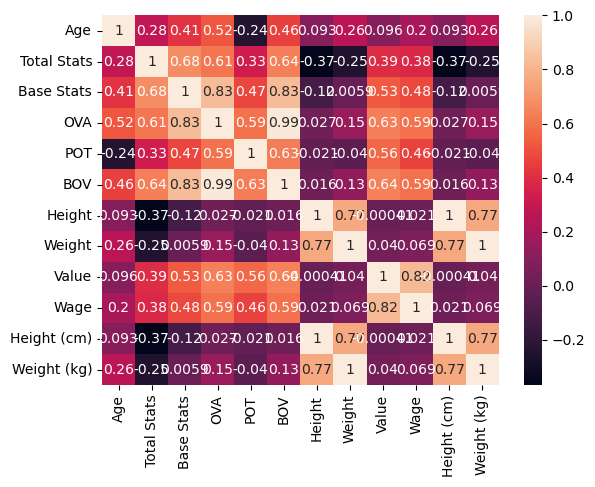

In [277]:
sns.heatmap(num_corr,annot=True)

In [278]:
px.scatter(x=New_Df_fifa1_numeric_drop['Value'], y=New_Df_fifa1_numeric_drop['OVA'])

In [279]:
condition = (New_Df_fifa1['OVA'] >= 80) & (New_Df_fifa1['Value'] <= 8000000)
underrated_players = New_Df_fifa1[(New_Df_fifa1['OVA'] >= 80) & (New_Df_fifa1['Value'] <= 8000000)]
underrated_players

,Name,Nationality,Club,Age,BP,Position,Total Stats,Base Stats,OVA,POT,BOV,Height,Weight,foot,Value,Wage,Release Clause,Height (cm),Weight (kg)
4,Iniesta,Spain,Vissel Kobe,36,CAM,CM CAM,2014,420,81,81,82,170.18,68.04,Right,5500000,12000,€7.200000,170.18,68.04
9,P. Scholes,England,Manchester United,37,CAM,CM CDM,2065,415,80,80,82,170.18,71.21,Right,400000,40000,€0,170.18,71.21
12,R. Keane,Republic of Ireland,LA Galaxy,35,CF,ST,1974,407,80,80,81,175.26,73.03,Right,5500000,10000,€0,175.26,73.03
14,O. Kahn,Germany,FC Bayern München,38,GK,GK,1196,468,87,90,87,187.96,89.81,Right,0,0,€0,187.96,89.81
26,G. Buffon,Italy,Juventus,42,GK,GK,1292,429,82,82,82,193.04,92.08,Right,2200000,41000,€3.600000,193.04,92.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13343,L. Dálves,Uruguay,Uruguay,28,ST,ST CF,1902,402,80,80,80,187.96,83.01,Right,0,0,€0,187.96,83.01
13345,M. Nérez,Uruguay,Uruguay,32,LB,LB LM,2065,436,80,80,80,177.80,68.95,Left,0,0,€0,177.80,68.95
13346,E. Schetino,Uruguay,Uruguay,28,CB,CB,1882,402,80,80,80,185.42,79.83,Right,0,0,€0,185.42,79.83
13347,J. Sildero,Uruguay,Uruguay,28,CAM,CAM RM,2062,428,80,80,80,177.80,74.84,Right,0,0,€0,177.80,74.84


In [280]:
underrated_players.reset_index().drop(columns='index' ,inplace=True)

In [281]:
underrated_players

,Name,Nationality,Club,Age,BP,Position,Total Stats,Base Stats,OVA,POT,BOV,Height,Weight,foot,Value,Wage,Release Clause,Height (cm),Weight (kg)
4,Iniesta,Spain,Vissel Kobe,36,CAM,CM CAM,2014,420,81,81,82,170.18,68.04,Right,5500000,12000,€7.200000,170.18,68.04
9,P. Scholes,England,Manchester United,37,CAM,CM CDM,2065,415,80,80,82,170.18,71.21,Right,400000,40000,€0,170.18,71.21
12,R. Keane,Republic of Ireland,LA Galaxy,35,CF,ST,1974,407,80,80,81,175.26,73.03,Right,5500000,10000,€0,175.26,73.03
14,O. Kahn,Germany,FC Bayern München,38,GK,GK,1196,468,87,90,87,187.96,89.81,Right,0,0,€0,187.96,89.81
26,G. Buffon,Italy,Juventus,42,GK,GK,1292,429,82,82,82,193.04,92.08,Right,2200000,41000,€3.600000,193.04,92.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13343,L. Dálves,Uruguay,Uruguay,28,ST,ST CF,1902,402,80,80,80,187.96,83.01,Right,0,0,€0,187.96,83.01
13345,M. Nérez,Uruguay,Uruguay,32,LB,LB LM,2065,436,80,80,80,177.80,68.95,Left,0,0,€0,177.80,68.95
13346,E. Schetino,Uruguay,Uruguay,28,CB,CB,1882,402,80,80,80,185.42,79.83,Right,0,0,€0,185.42,79.83
13347,J. Sildero,Uruguay,Uruguay,28,CAM,CAM RM,2062,428,80,80,80,177.80,74.84,Right,0,0,€0,177.80,74.84


In [282]:
underrated_players.sort_values(by='Age')

,Name,Nationality,Club,Age,BP,Position,Total Stats,Base Stats,OVA,POT,BOV,Height,Weight,foot,Value,Wage,Release Clause,Height (cm),Weight (kg)
8950,Welington Dano,Brazil,Brazil,20,LB,LB LM,2068,436,81,81,81,177.80,68.95,Left,0,0,€0,177.80,68.95
1427,B. Ronhaar,Netherlands,Netherlands,23,CF,LW,1603,438,87,90,88,180.34,73.94,Left,0,0,€0,180.34,73.94
8894,Juiano Mestres,Brazil,Brazil,24,CB,CB CDM,2003,413,81,81,81,180.34,82.10,Right,0,0,€0,180.34,82.10
13346,E. Schetino,Uruguay,Uruguay,28,CB,CB,1882,402,80,80,80,185.42,79.83,Right,0,0,€0,185.42,79.83
13347,J. Sildero,Uruguay,Uruguay,28,CAM,CAM RM,2062,428,80,80,80,177.80,74.84,Right,0,0,€0,177.80,74.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,O. Kahn,Germany,FC Bayern München,38,GK,GK,1196,468,87,90,87,187.96,89.81,Right,0,0,€0,187.96,89.81
170,D. Drogba,Ivory Coast,NaN,38,ST,ST,1956,401,81,81,79,187.96,79.83,Right,0,0,€0,187.96,79.83
239,E. van der Sar,Netherlands,Manchester United,39,GK,GK,1272,467,83,87,83,198.12,88.90,Right,0,0,€0,198.12,88.90
32,F. Totti,Italy,Roma,39,CAM,CF ST,1872,378,80,80,82,180.34,82.10,Right,1500000,60000,€0,180.34,82.10


In [283]:
round(underrated_players.describe(), 2)

,Age,Total Stats,Base Stats,OVA,POT,BOV,Height,Weight,Value,Wage,Height (cm),Weight (kg)
count,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00,80.00
mean,34.12,1791.74,418.82,81.09,81.86,81.03,182.82,79.45,3348750.00,28075.00,182.82,79.45
std,3.37,307.18,25.51,1.63,3.03,2.02,6.65,6.88,3090901.05,30898.68,6.65,6.88
min,20.00,1136.00,345.00,80.00,80.00,78.00,167.64,63.05,0.00,0.00,167.64,63.05
25%,33.00,1598.50,401.75,80.00,80.00,80.00,177.80,74.84,0.00,0.00,177.80,74.84
50%,34.50,1903.50,421.50,80.00,81.00,81.00,182.88,79.83,3400000.00,19000.00,182.88,79.83
75%,36.00,2046.00,437.25,82.00,82.00,82.00,187.96,83.91,6125000.00,50000.00,187.96,83.91
max,42.00,2239.00,468.00,87.00,91.00,89.00,198.12,92.08,8000000.00,105000.00,198.12,92.08


In [284]:
under_numeric = underrated_players.select_dtypes(include=['int64', 'float64'])
new_corr = under_numeric.corr()

<Axes: >

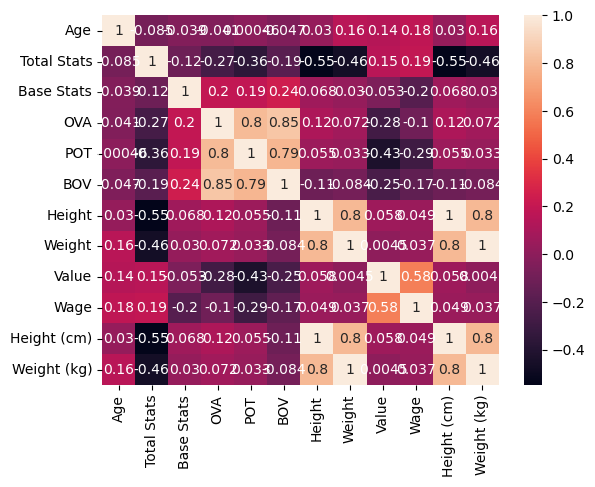

In [285]:
sns.heatmap(new_corr,annot=True)

In [286]:
Height_ts = underrated_players[['Height', 'Total Stats']]
Height_ts

,Height,Total Stats
4,170.18,2014
9,170.18,2065
12,175.26,1974
14,187.96,1196
26,193.04,1292
...,...,...
13343,187.96,1902
13345,177.80,2065
13346,185.42,1882
13347,177.80,2062


In [287]:
X = Height_ts.drop('Height',axis=1)
y = Height_ts['Height']

In [288]:
model = linear_model.LinearRegression()
result = model.fit(X,y)

In [289]:
result.score(X,y)

0.3000021368276068